In [1]:
using Distributions
using Optim

function my_fit_mle(::Type{<:Beta}, sample::AbstractArray)
    f(w) = -loglikelihood(Beta(exp.(w)...), sample)
    o = optimize(f, zeros(2))
    Beta(exp.(o.minimizer)...)
end

@show sample = rand(Beta(0.01, 3), 20)
@show fit(Beta, sample)
@show my_fit_mle(Beta, sample)
@show fit_mle(Beta, sample);

sample = rand(Beta(0.01, 3), 20) = [1.6795000206533662e-59, 1.9119466651588446e-33, 8.060444470932585e-48, 3.609199076187185e-36, 2.618668936316359e-233, 3.3864871895790037e-106, 5.653231060099203e-12, 6.882826860725081e-35, 3.16982317718987e-36, 1.8371969157211133e-32, 2.360821608002761e-11, 1.2191629605558148e-45, 2.2066457105662913e-6, 2.5100623145488594e-12, 2.322273728656678e-12, 9.613590126870692e-32, 8.375405061720543e-6, 3.3689171548614968e-25, 1.1179117171547747e-12, 8.275166534613795e-68]
fit(Beta, sample) = Beta{Float64}(α=0.07662366707109318, β=144817.62224417354)
my_fit_mle(Beta, sample) = Beta{Float64}(α=0.01147092921141326, β=21683.689866672576)


LoadError: ArgumentError: Beta: the condition α > zero(α) && β > zero(β) is not satisfied.

In [2]:
@which fit_mle(Beta, sample)

fit_mle(::Type{<:Beta}, x::AbstractArray{T}; maxiter, tol) where T<:Real in Distributions at D:\.julia\packages\Distributions\fXTVC\src\univariate\continuous\beta.jl:207

In [3]:
using Plots
pyplot(fmt = :svg)

function sim_beta(; dist_true=Beta(0.01, 3), n=20, L=10^3)
    Fit = similar([0.0], 2, L)
    MLE = similar(Fit)
    for l in 1:L
        sample = rand(dist_true, n)
        Fit[:,l] = collect(params(fit(Beta, sample)))
        MLE[:,l] = collect(params(my_fit_mle(Beta, sample)))
    end
    Fit, MLE
end

function plot_sim_beta(; dist_true = Beta(0.03, 3), n=20, L=10^3)
    a, b = params(dist_true)
    Fit, MLE = sim_beta(; dist_true)

    P = plot(; scale=:log10)
    scatter!(Fit[1,:], Fit[2,:]; label="fit(Beta, sample)", alpha=0.3, ms=2, msa=0.0)
    scatter!([a], [b]; msa=0.0, label="true", color=:red)

    Q = plot(; scale=:log10)
    scatter!(MLE[1,:], MLE[2,:]; label="my_fit_mle(Beta, sample)", alpha=0.3, ms=2, msa=0.0)
    scatter!([a], [b]; msa=0.0, label="true", color=:red)

    plot(P, Q; layout=(1, 2), size=(800, 250))
end

plot_sim_beta (generic function with 1 method)

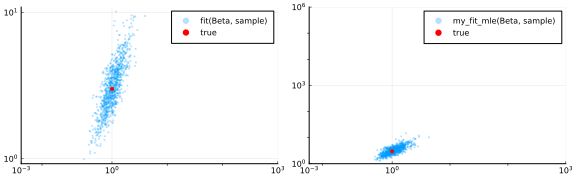

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall D:\.julia\packages\PyCall\BD546\src\numpy.jl:67
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = _before_layout_calcs(plt::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:1041
└ @ Plots D:\.julia\packages\Plots\snhSk\src\backends\pyplot.jl:1041
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = _before_layout_calcs(plt::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:1059
└ @ Plots D:\.julia\packages\Plots\snhSk\src\backends\pyplot.jl:1059
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elem

In [4]:
plot_sim_beta(dist_true = Beta(1, 3))

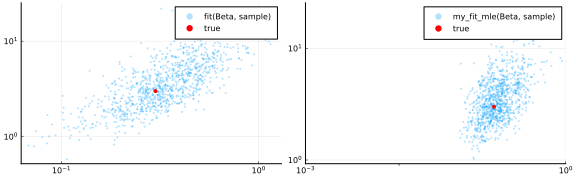

┌ Warning: No strict ticks found
└ @ PlotUtils D:\.julia\packages\PlotUtils\n4I4Q\src\ticks.jl:295


In [5]:
plot_sim_beta(dist_true = Beta(0.3, 3))

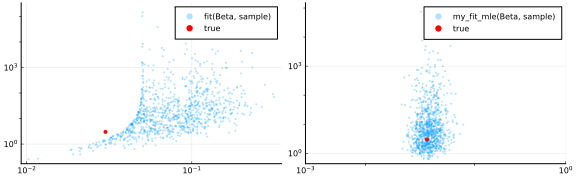

┌ Warning: No strict ticks found
└ @ PlotUtils D:\.julia\packages\PlotUtils\n4I4Q\src\ticks.jl:295


In [6]:
plot_sim_beta(dist_true = Beta(0.03, 3))